<a href="https://colab.research.google.com/github/UsernameLucky/Hotel_Reservation/blob/main/DBSCAN_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN Algorithm.

### Import the libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

### Parameterization

In [ ]:
def dbscan(X, eps, min_pts):
    # Implementation of the DBSCAN algorithm
    pass


### Core point identification

The following function in the DBSCAN algorithm iterates through each point in the dataset and calculates the distance to all other points using a numpy function. It then counts how many points are within the specified $\epsilon$ distance and adds their indices to a list of neighbors. If the number of neighbors is greater than or equal to the minimum number of points required to form a cluster, the current point is classified as a core point, and its index is added to the list of core points. The function returns this list of core points, which are essential for identifying and expanding clusters in the dataset.

In [ ]:
def find_core_points(X, eps, min_pts):
    core_points = []
    for i in range(len(X)):
        # Compute the distance to all other points
        neighbors = []
        for j in range(len(X)):
            if i != j:
                dist = np.linalg.norm(X[i] - X[j])
                if dist <= eps:
                    neighbors.append(j)
        # Check if the point is a core point
        if len(neighbors) >= min_pts:
            core_points.append(i)
    return core_points


### Density based clustering

### Finding Neighbours

This function finds the neighbors of a given point with index point_id in the dataset X. It iterates over all points in X and calculates the distance between the given point and each other point using a numpy function. If the distance is less than or equal to epsilon, the index of the point is added to the neighbours list. The function returns the list of indices of neighbors of the given point.

In [ ]:
def find_neighbors(X, point_id, eps):
    neighbors = []
    for i, x in enumerate(X):
        if np.linalg.norm(X[point_id] - x) <= eps:
            neighbors.append(i)
    return neighbors

### Expanding Clusters

The expand cluster function in DBSCAN grows a cluster from a core point. It starts by initializing a queue with the core point's index and a set to keep track of visited points. The function iterates through the queue, visiting each point and finding its neighbors. If a point has enough neighbors to be considered a core point, it is assigned to the current cluster, and its neighbors are added to the queue if they haven't been visited yet. The function also updates the labels array to assign the cluster ID to each point. If a neighbor was previously marked as noise, it is removed from the noise points list. If a point does not have enough neighbors to be a core point, it is added to the noise points list. The function continues this process until all points in the cluster have been visited, and then returns the updated labels array and noise points list.

In [ ]:
def expand_cluster(X, labels, noise_points, point_id, cluster_id, eps, min_pts):
    # Define a queue to hold the neighbors to be processed
    queue = [point_id]
    visited = set()  # Initialize a set to keep track of visited points
    while queue:
        current_point = queue.pop(0)
        if current_point in visited:
            continue
        visited.add(current_point)
        # Find the neighbors of the current point
        neighbors = find_neighbors(X, current_point, eps)
        # If the current point is a core point
        if len(neighbors) >= min_pts:
            # Assign the cluster ID to the current point
            labels[current_point] = cluster_id
            # Add the neighbors to the queue
            for neighbor in neighbors:
                if labels[neighbor] == -1 or labels[neighbor] == 0:
                    if neighbor in noise_points:
                        # Remove neighbor from noise points if it is noise
                        noise_points.remove(neighbor)
                    queue.append(neighbor)
                    # Assign the cluster ID to the neighbor
                    labels[neighbor] = cluster_id
        else:
            # Add the current point to the noise points
            if current_point not in noise_points:
                noise_points.append(current_point)
    # Return the updated labels and noise points
    return labels, noise_points


### DBSCAN Function

The dbscan function implements the DBSCAN clustering algorithm by first finding all core points in the dataset. It then initializes the cluster ID, labels all points as noise points, and creates an empty list for noise points. For each core point, if it has not been assigned to any cluster yet, the function increments the cluster ID, indicating a new cluster, and expands the cluster using the expand cluster function. The expand cluster function updates the labels array to assign the current cluster ID to each point in the expanded cluster and updates the noise points list if any noise points are reassigned to clusters. After processing all core points, the function returns the labels array containing the cluster assignments for each point and the noise points list containing the indices of points classified as noise.

In [ ]:
def dbscan(X, eps, min_pts):
    core_points = find_core_points(X, eps, min_pts)
    cluster_id = 0
    labels = np.full(len(X), -1)    # Initialize all points as noise points (-1)
    noise_points = []  # Initialize an empty list for noise points

    for point_id in core_points:
        if labels[point_id] == -1:  # If the point is not assigned to any cluster
            cluster_id += 1
            labels, noise_points = expand_cluster(X, labels, noise_points, point_id, cluster_id, eps, min_pts)

    return labels, noise_points


### Using the real GDP dataset

We load a real life dataset.

In [ ]:
df = pd.read_csv("realGDP.csv")
df.head()

,tyear,Agriculture,CropProduction,Livestock,Forestry,Fishing,Industry,Petroleum,SolidMinerals,Manufacturing,...,Utilities,Hospitality,Finance_Insurance,RealEstate,Science_Tech,PublicAdministration,Education,SocialServices,Entertainment,OtherServices
0,1981,2364373.15,1854764.44,341411.50,77897.99,90299.23,6603250.12,4977416.70,67136.73,1558696.70,...,18393.65,53784.58,282170.74,1063959.81,421381.98,807075.54,242555.85,110697.65,4561.07,132700.20
1,1982,2425960.89,1897078.85,361115.70,73910.25,93856.08,6272828.03,4453093.63,54840.50,1764893.89,...,17174.34,50804.26,372267.76,1074049.33,423670.54,825921.69,248219.81,113282.57,4597.76,133767.58
2,1983,2409081.92,1842704.31,393131.01,75282.78,97963.82,5264881.39,4052977.68,44014.84,1167888.87,...,22263.13,42696.03,336896.50,1086703.98,481170.73,844767.84,253883.77,115867.49,4324.58,125819.69
3,1984,2303505.42,1759115.15,399685.38,76694.14,68010.74,5621181.44,4559196.21,43078.37,1018906.87,...,19310.83,35968.39,267287.62,1086931.99,518359.90,863613.99,259547.73,118452.41,3543.43,103092.67
4,1985,2731062.47,2180907.71,428102.85,78082.45,43969.46,6379599.38,4918272.50,44539.09,1416787.79,...,15498.05,33192.60,254993.44,1091378.22,602464.66,882460.14,265211.69,121037.33,3395.55,98790.30


We select the columns Agriculture and Industry as they reflect spatial or density like characteristics. They are both economic activites.\
The selected data is then normalized using StandardScaler to standardize the features by removing the mean and scaling to unit variance.

In [ ]:
# Select columns for clustering
X = df[['Agriculture', 'Industry']].values

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Identifying the epsilon

We use the k-nearest neighbors algorithm to find the distance to the kth nearest neighbor for each data point.We sort and plot these distances to help determine an appropriate epsilon value for DBSCAN.

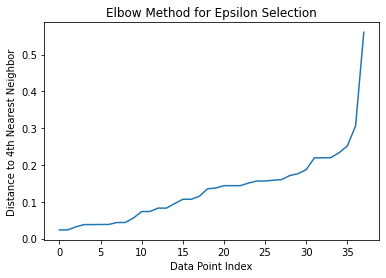

In [ ]:
# Fit a k-nearest neighbors model to find the distance to the kth nearest neighbor
k = 4  # Choose a value for k
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X_scaled)
distances, _ = neigh.kneighbors(X_scaled)

# Sort and plot the distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('Data Point Index')
plt.ylabel('Distance to {}th Nearest Neighbor'.format(k))
plt.title('Elbow Method for Epsilon Selection')
plt.show()

We take the epsilon to be 0.3, even though the elbow is not sharp enough.

#### Determine the minimum points

We use a k-nearest neighbors algorithm to find the number of neighbors within the epsilon radius for each data point. The distribution of these neighbor counts is then plotted to assist in determining the minimum points value for DBSCAN.

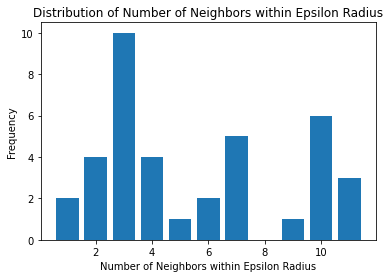

In [ ]:
# Fit a k-nearest neighbors model to find the number of neighbors within epsilon radius
eps = 0.3  # Use the epsilon value
neigh = NearestNeighbors(radius=eps)
neigh.fit(X_scaled)
num_neighbors = neigh.radius_neighbors(X_scaled, return_distance=False)

# Plot the distribution of the number of neighbors
num_neighbors = [len(neighbors) for neighbors in num_neighbors]
plt.hist(num_neighbors, bins=range(1, max(num_neighbors)+2), align='left', rwidth=0.8)
plt.xlabel('Number of Neighbors within Epsilon Radius')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Neighbors within Epsilon Radius')
plt.show()

Firts try 4 as a minimum point

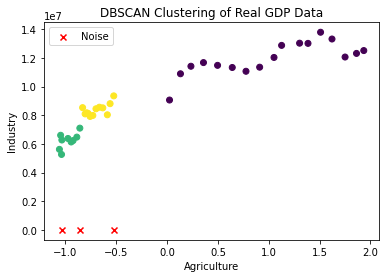

In [ ]:
# Run the DBSCAN algorithm
eps = 0.3  # Set the epsilon value
min_pts = 4  # Set the minimum points value
labels, noise_points = dbscan(X_scaled, eps, min_pts)

# Visualize the clusters and noise points
plt.scatter(X_scaled[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(X_scaled[noise_points, 0], X_scaled[noise_points, 1], c='red', marker='x', label='Noise')
plt.xlabel('Agriculture')
plt.ylabel('Industry')
plt.title('DBSCAN Clustering of Real GDP Data')
plt.legend()
plt.show()


When we use 4 as the number of our minimum points, we get 3 noise points and 3 clusters.

We try 6.

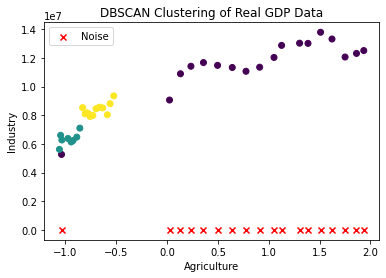

In [ ]:
# Run the DBSCAN algorithm
eps = 0.3  # Set the epsilon value
min_pts = 6 # Set the minimum points value
labels, noise_points = dbscan(X_scaled, eps, min_pts)

# Visualize the clusters and noise points
plt.scatter(X_scaled[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(X_scaled[noise_points, 0], X_scaled[noise_points, 1], c='red', marker='x', label='Noise')
plt.xlabel('Agriculture')
plt.ylabel('Industry')
plt.title('DBSCAN Clustering of Real GDP Data')
plt.legend()
plt.show()

When we use 6, we get a lot more noise.

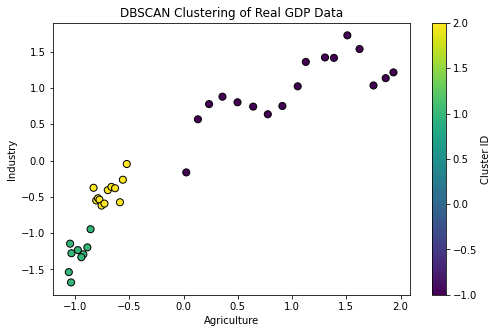

In [ ]:
# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('DBSCAN Clustering of Real GDP Data')
plt.xlabel('Agriculture')
plt.ylabel('Industry')
plt.colorbar(label='Cluster ID')
plt.show()


In [ ]:
# Find core points
core_points = find_core_points(X_scaled, eps, min_pts)

# Initialize labels and noise points
labels = [-1] * len(X_scaled)
noise_points = []

# Expand clusters from core points
for point_id in core_points:
    if labels[point_id] == -1:
        cluster_id += 1
        labels, noise_points = expand_cluster(X_scaled, labels, noise_points, point_id, cluster_id, eps, min_pts)

# Print core points, noise points, and clusters
print("Core Points:", core_points)
print("Noise Points:", noise_points)
print("Clusters:", set(labels))  # Using set to get unique cluster labels


Core Points: [0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Noise Points: [8, 2, 20]
Clusters: {0, 1, -1}


We identify the core points, the noise and the clusters.

### Metrics for the RealGDP dataset

In [ ]:
# Evaluate clustering using internal metrics
silhouette_score = metrics.silhouette_score(X_scaled, labels)
davies_bouldin_score = metrics.davies_bouldin_score(X_scaled, labels)
calinski_harabasz_score = metrics.calinski_harabasz_score(X_scaled, labels)

# Print results
print("Internal Metrics:")
print("Silhouette Score:", silhouette_score)
print("Davies-Bouldin Score:", davies_bouldin_score)
print("Calinski-Harabasz Score:", calinski_harabasz_score)

Internal Metrics:
Silhouette Score: 0.6271472080292025
Davies-Bouldin Score: 0.37203862843210894
Calinski-Harabasz Score: 111.39621509156105


From the above results, Silhouette Score of 0.627, Davies-Bouldin Score of 0.372, and Calinski-Harabasz Score of 111.396 suggest reasonably good clustering with well-matched objects, well-separated clusters, and good separation and compactness of clusters, respectively.

### Synthetic datasets


We generate a synthetic dataset with blobs, it has 300 samples and 4 centers.

We specify epsilon  and minimum points . The result of the clustering is stored in labels_blobs. The code then plots the clusters where each point is colored according to its cluster label.

In [ ]:
# Generate a synthetic dataset with blobs
X_blobs, y_blobs = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)


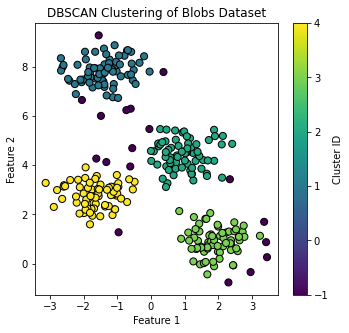

In [ ]:
eps_blobs = 0.5
min_pts_blobs = 5
labels_blobs, _ = dbscan(X_blobs, eps_blobs, min_pts_blobs)

# Plot the clusters with different colors
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels_blobs, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('DBSCAN Clustering of Blobs Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster ID')


The plot shows the distribution of points in the dataset in a 2D space defined by Feature 1 and Feature 2, with each cluster represented by a different color. The colorbar provides a reference for the cluster IDs. We identify 4 clusters.

The following code visualizes the DBSCAN clustering results on the blobs dataset. It plots all data points in gray, highlights core points in red and noise points in blue. It thenplots each cluster's points with a distinct marker and color, labeling them accordingly.

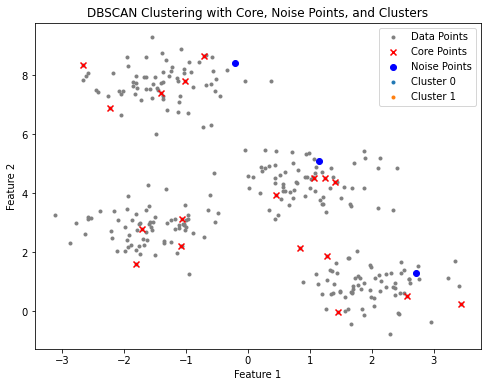

In [ ]:
# Plot the entire dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c='gray', marker='.', label='Data Points')

# Plot core points
core_points_X = X_blobs[np.isin(range(len(X_blobs)), core_points)]
plt.scatter(core_points_X[:, 0], core_points_X[:, 1], c='red', marker='x', label='Core Points')

# Plot noise points
plt.scatter(X_blobs[noise_points][:, 0], X_blobs[noise_points][:, 1], c='blue', marker='o', label='Noise Points')

# Plot clusters
for cluster_id in set(labels):
    if cluster_id == -1:
        continue  # Skip noise points
    cluster_points_X = X_blobs[labels == cluster_id]
    plt.scatter(cluster_points_X[:, 0], cluster_points_X[:, 1], marker='.', label=f'Cluster {cluster_id}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering with Core, Noise Points, and Clusters')
plt.legend()
plt.show()


The above is a view of the clustering outcome, showing core points, noise points, and different clusters based on their spatial distribution in the feature space Feature 1 and Feature 2.We have very few instances of noise.

In [ ]:
# Find core points
core_points = find_core_points(X_blobs, eps, min_pts)

# Initialize labels and noise points
labels = [-1] * len(X_blobs)
noise_points = []

# Expand clusters from core points
for point_id in core_points:
    if labels[point_id] == -1:
        cluster_id += 1
        labels, noise_points = expand_cluster(X_blobs, labels, noise_points, point_id, cluster_id, eps, min_pts)

# Print core points, noise points, and clusters
print("Core Points:", core_points)
print("Noise Points:", noise_points)
print("Clusters:", set(labels))  # Using set to get unique cluster labels


Core Points: [1, 3, 10, 12, 15, 16, 18, 20, 23, 24, 26, 34, 39, 41, 44, 45, 47, 48, 53, 55, 58, 61, 63, 65, 67, 69, 72, 73, 76, 77, 78, 81, 86, 89, 90, 91, 93, 94, 97, 103, 104, 112, 114, 116, 121, 125, 126, 132, 141, 145, 146, 149, 150, 151, 153, 155, 157, 158, 161, 162, 172, 175, 178, 179, 180, 183, 187, 188, 191, 192, 193, 198, 203, 206, 208, 211, 214, 220, 228, 232, 234, 235, 236, 237, 239, 243, 244, 245, 246, 248, 251, 252, 258, 259, 260, 263, 265, 272, 278, 279, 281, 283, 284, 286, 289, 291, 294, 299]
Noise Points: [134, 148, 189, 199, 31, 46, 60, 52, 156, 171, 84, 64, 182, 254, 38, 247, 195, 194, 201, 216, 74, 210, 43, 70, 107, 2, 186, 22, 27, 297, 40, 29, 169, 200, 266, 240, 280, 177, 176, 49, 17, 217, 222, 270, 82, 128, 87, 167, 184, 212, 241, 261]
Clusters: {2, 3, 4, 5, 6, -1}


The above output shows a list of our core points, our noise points and the clusters.

In [ ]:
# Evaluate clustering using internal metrics
silhouette_score = metrics.silhouette_score(X_blobs, labels_blobs)
davies_bouldin_score = metrics.davies_bouldin_score(X_blobs, labels_blobs)
calinski_harabasz_score = metrics.calinski_harabasz_score(X_blobs, labels_blobs)

# Print results
print("Internal Metrics:")
print("Silhouette Score:", silhouette_score)
print("Davies-Bouldin Score:", davies_bouldin_score)
print("Calinski-Harabasz Score:", calinski_harabasz_score)

Internal Metrics:
Silhouette Score: 0.6303800996842714
Davies-Bouldin Score: 2.782135079354487
Calinski-Harabasz Score: 473.01705579439067


A Silhouette Score of 0.63 suggests that the clustering is reasonably good, with objects well-matched to their clusters. The Davies-Bouldin Score of 2.78 indicates some overlap or less distinct clusters, as it is higher. The Calinski-Harabasz Score of 473.02 suggests good separation and compactness of clusters.


In [ ]:
# Evaluate clustering using external metrics
adjusted_rand_index = metrics.adjusted_rand_score(y_blobs, labels_blobs)
adjusted_mutual_info = metrics.adjusted_mutual_info_score(y_blobs, labels_blobs)
homogeneity_score = metrics.homogeneity_score(y_blobs, labels_blobs)
completeness_score = metrics.completeness_score(y_blobs, labels_blobs)
v_measure_score = metrics.v_measure_score(y_blobs, labels_blobs)
print("\nExternal Metrics:")
print("Adjusted Rand Index:", adjusted_rand_index)
print("Adjusted Mutual Information:", adjusted_mutual_info)
print("Homogeneity Score:", homogeneity_score)
print("Completeness Score:", completeness_score)
print("V-Measure Score:", v_measure_score)


External Metrics:
Adjusted Rand Index: 0.9142455421439392
Adjusted Mutual Information: 0.8934824507810424
Homogeneity Score: 0.941359421591609
Completeness Score: 0.8529609474781126
V-Measure Score: 0.8949826775633365


The Adjusted Rand Index (ARI) of 0.914 suggests a high similarity between the clustering and the ground truth labels. The Adjusted Mutual Information (AMI) of 0.893 indicates a good agreement between the clustering and the ground truth. The Homogeneity Score of 0.941 suggests high homogeneity within clusters, meaning each cluster contains mostly members of a single class. The Completeness Score of 0.853 suggests that most members of each class are assigned to the same cluster. The V-Measure Score of 0.895 indicates a good balance between homogeneity and completeness.


We generate a synthetic dataset with moons, it has 300 samples and 4 centers.

We specify epsilon  and minimum points . The result of the clustering is stored in labels_moons. The code then plots the clusters where each point is colored according to its cluster label.

In [ ]:
# Generate a synthetic dataset with moons
X_moons, y_moons = make_moons(n_samples=300, noise=0.15, random_state=0)


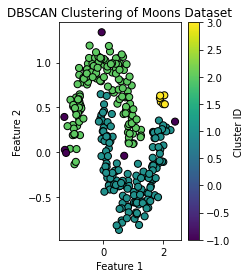

In [ ]:
eps_moons = 0.2
min_pts_moons = 5
labels_moons, _ = dbscan(X_moons, eps_moons, min_pts_moons)
plt.subplot(1, 2, 2)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_moons, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('DBSCAN Clustering of Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster ID')

plt.show()


The plot shows the distribution of points in the dataset in a 2D space defined by Feature 1 and Feature 2, with each cluster represented by a different color. The colorbar provides a reference for the cluster IDs. We identify 3 clusters.

The following code visualizes the DBSCAN clustering results on the moons dataset. It plots all data points in gray, highlights core points in red and noise points in blue. It thenplots each cluster's points with a distinct marker and color, labeling them accordingly.

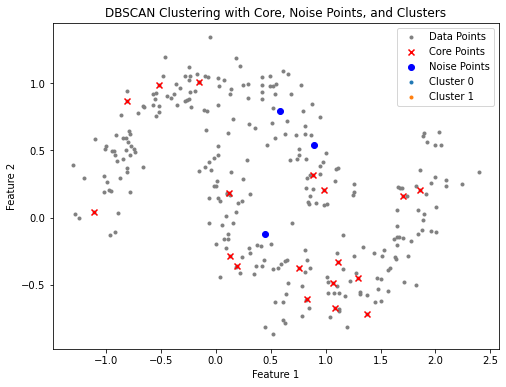

In [ ]:
# Plot the entire dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c='gray', marker='.', label='Data Points')

# Plot core points
core_points_X = X_moons[core_points]
plt.scatter(core_points_X[:, 0], core_points_X[:, 1], c='red', marker='x', label='Core Points')

# Plot noise points
noise_points_X = X_moons[noise_points]
plt.scatter(noise_points_X[:, 0], noise_points_X[:, 1], c='blue', marker='o', label='Noise Points')

# Plot clusters
for cluster_id in set(labels):  # Iterate over unique labels, including -1 for noise
    if cluster_id == -1:
        continue  # Skip noise points
    cluster_points_X = X_moons[labels == cluster_id]
    plt.scatter(cluster_points_X[:, 0], cluster_points_X[:, 1], marker='.', label=f'Cluster {cluster_id}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering with Core, Noise Points, and Clusters')
plt.legend()
plt.show()


The above is a view of the clustering outcome, showing core points, noise points, and different clusters based on their spatial distribution in the feature space Feature 1 and Feature 2.We have very few instances of noise.

In [ ]:
# Find core points
core_points = find_core_points(X_moons, eps, min_pts)

# Initialize labels and noise points
labels = [-1] * len(X_moons)
noise_points = []

# Expand clusters from core points
for point_id in core_points:
    if labels[point_id] == -1:
        cluster_id += 1
        labels, noise_points = expand_cluster(X_moons, labels, noise_points, point_id, cluster_id, eps, min_pts)

# Print core points, noise points, and clusters
print("Core Points:", core_points)
print("Noise Points:", noise_points)
print("Clusters:", set(labels))  # Using set to get unique cluster labels


Core Points: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 208, 209, 210, 211, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,

In [ ]:
# Evaluate clustering using internal metrics
silhouette_score = metrics.silhouette_score(X_moons, labels_moons)
davies_bouldin_score = metrics.davies_bouldin_score(X_moons, labels_moons)
calinski_harabasz_score = metrics.calinski_harabasz_score(X_moons, labels_moons)

# Print results
print("Internal Metrics:")
print("Silhouette Score:", silhouette_score)
print("Davies-Bouldin Score:", davies_bouldin_score)
print("Calinski-Harabasz Score:", calinski_harabasz_score)

Internal Metrics:
Silhouette Score: 0.14670020853762267
Davies-Bouldin Score: 3.6572640507386303
Calinski-Harabasz Score: 68.35756256244332


The Silhouette Score of 0.147 suggests that the clustering is not very dense and clusters are not well-separated. The Davies-Bouldin Score of 3.657 indicates some overlap or less distinct clusters, as it is higher. The Calinski-Harabasz Score of 68.358 suggests that the clusters are not well-separated and compact.


In [ ]:
# Evaluate clustering using external metrics
adjusted_rand_index = metrics.adjusted_rand_score(y_moons, labels_moons)
adjusted_mutual_info = metrics.adjusted_mutual_info_score(y_moons, labels_moons)
homogeneity_score = metrics.homogeneity_score(y_moons, labels_moons)
completeness_score = metrics.completeness_score(y_moons, labels_moons)
v_measure_score = metrics.v_measure_score(y_moons, labels_moons)
print("\nExternal Metrics:")
print("Adjusted Rand Index:", adjusted_rand_index)
print("Adjusted Mutual Information:", adjusted_mutual_info)
print("Homogeneity Score:", homogeneity_score)
print("Completeness Score:", completeness_score)
print("V-Measure Score:", v_measure_score)


External Metrics:
Adjusted Rand Index: 0.8843836953752165
Adjusted Mutual Information: 0.816389678452183
Homogeneity Score: 0.9166732284503343
Completeness Score: 0.7379679430939389
V-Measure Score: 0.8176702822611628


The ARI of 0.884 indicates a high similarity between the clustering and the ground truth labels. The AMI of 0.816 suggests a good agreement between the clustering and the ground truth. The Homogeneity Score of 0.917 indicates high homogeneity within clusters. The Completeness Score of 0.738 suggests that some members of the ground truth classes are not well-clustered. The V-Measure Score of 0.818 indicates a good balance between homogeneity and completeness.